##  Contrast Limited Adaptive Histogram Equalization (CLAHE).

skimage.exposure.equalize_adapthist(image, kernel_size=None, clip_limit=0.01, nbins=256)

An algorithm for local contrast enhancement, that uses histograms computed over different tile regions of the image. Local details can therefore be enhanced even in regions that are darker or lighter than most of the image

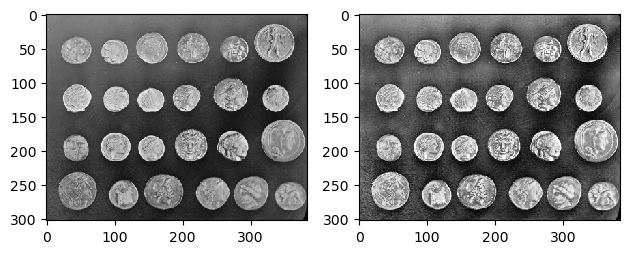

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import equalize_adapthist
from skimage import data, io
image = data.coins()
io.imshow(image)
new_coins = equalize_adapthist(image,clip_limit = 0.01,nbins=256)

plt.subplot(1,2,1)
io.imshow(image)

plt.subplot(1,2,2)
io.imshow(new_coins)


__Problem:__ Segment all $24$ coins from the image.

(1) thresholding (usig "thresholding_otsu")

(2) closing

(3) clear boundary

(4) remove small objects

(5) label 

0.474609375


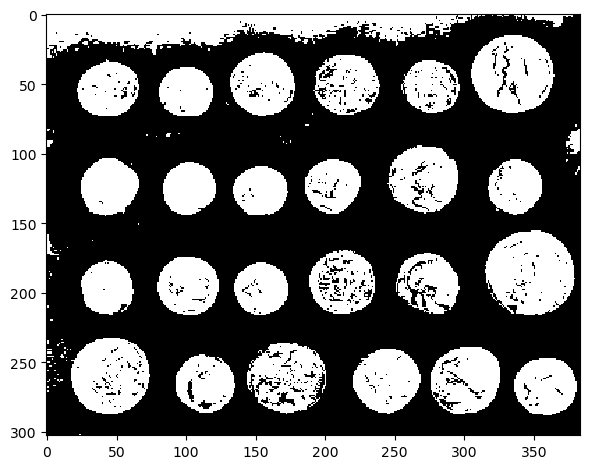

In [2]:
# Otsu
from skimage.filters import threshold_otsu

otsu = threshold_otsu(new_coins)
print(otsu)
binary = new_coins > otsu
io.imshow(binary)

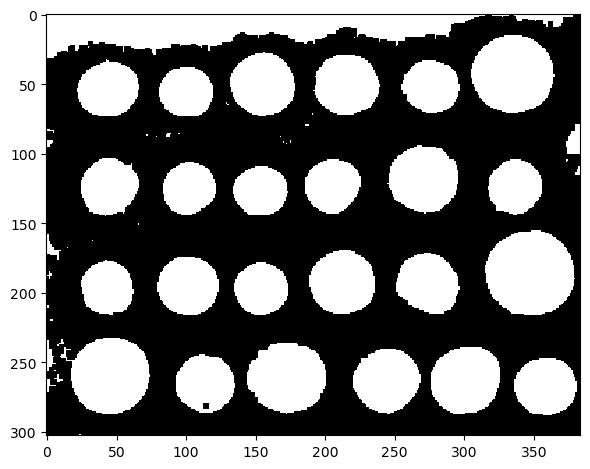

In [3]:
# Closing
from skimage.morphology import square, closing

B = square(4)
new_closed = closing(binary, B) 
io.imshow(new_closed)

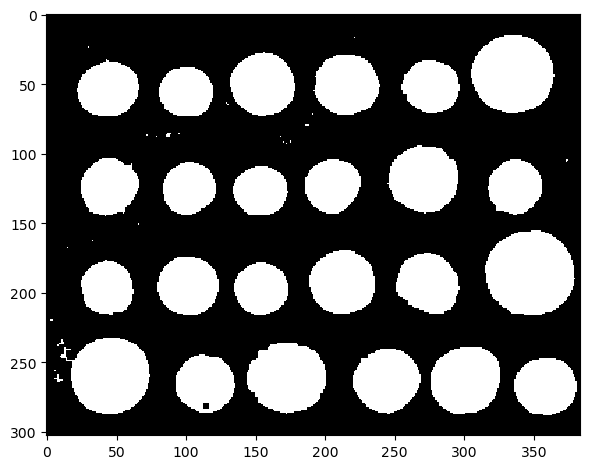

In [6]:
# Clear border
from skimage.segmentation import clear_border

cleared = clear_border(new_closed)
io.imshow(cleared)

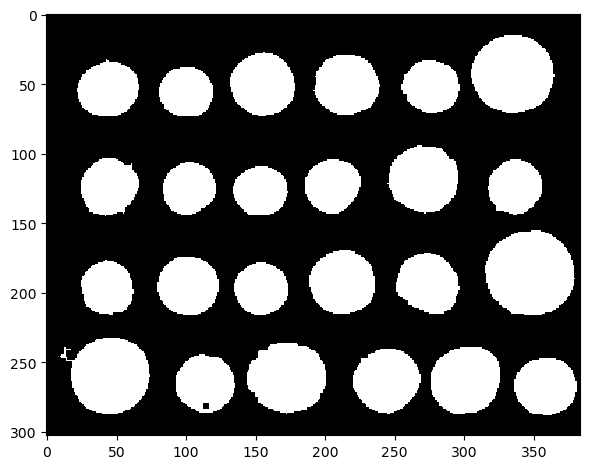

In [11]:
# Remove small objects
from skimage.morphology import remove_small_objects

removed = remove_small_objects(cleared)
io.imshow(removed)

C:\Users\a_j_p\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


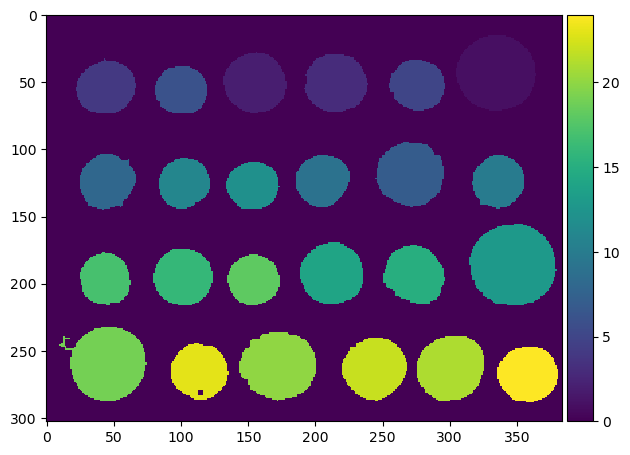

In [12]:
# Label 
from skimage.measure import label

image_label = label(removed)
io.imshow(image_label)

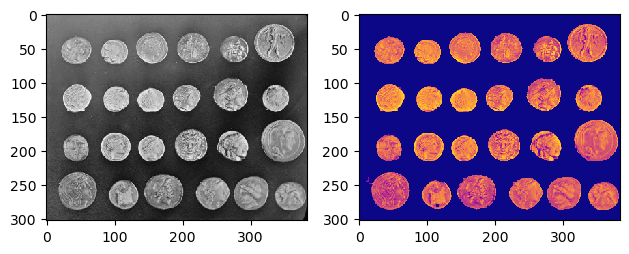

In [14]:
# Plot segmented image
seg = image * removed
plt.subplot(1,2,1)
io.imshow(image)
plt.subplot(1,2,2)
io.imshow(seg,cmap='plasma')

__Problem:__ Make the result better! 

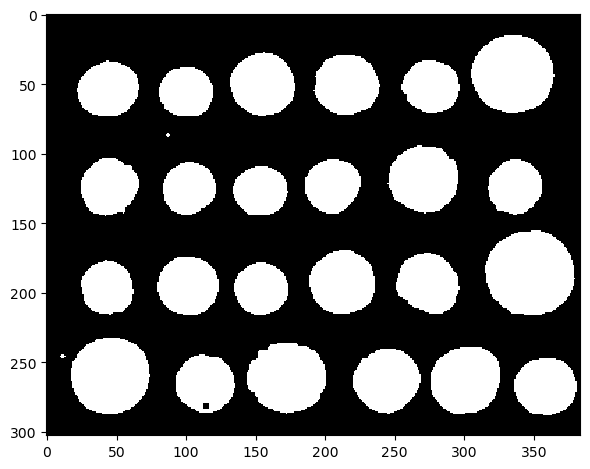

In [17]:
# open

from skimage.morphology import opening

new_cleared = opening(cleared)
io.imshow(new_cleared)

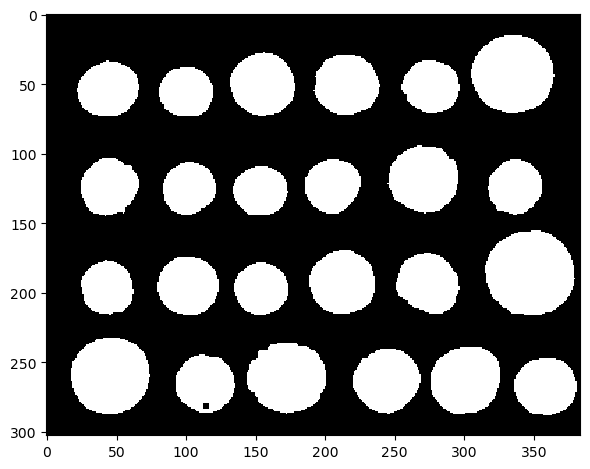

In [18]:
# remove

new_removed = remove_small_objects(new_cleared)
io.imshow(new_removed)

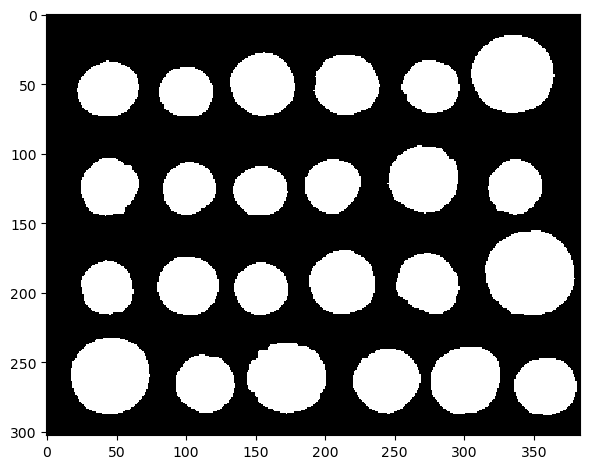

In [21]:
# close

from skimage.morphology import closing

B = square(6)
new_closed = closing(new_removed, B)
io.imshow(new_closed)

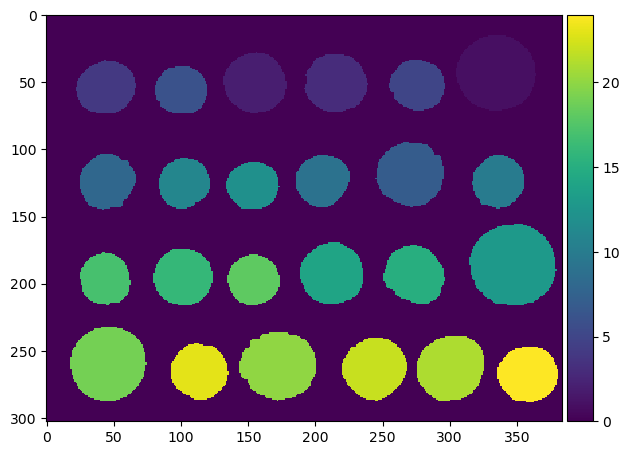

In [22]:
new_label = label(new_closed)
io.imshow(new_label)

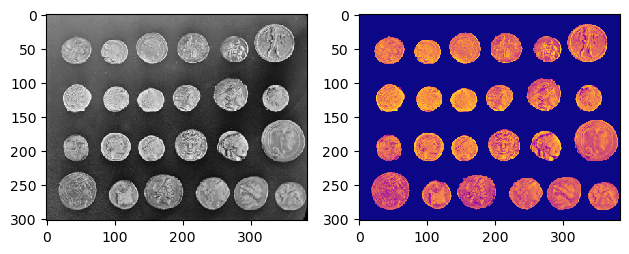

In [27]:
#Plot the result
plt.subplot(1,2,1)
io.imshow(image)
plt.subplot(1,2,2)
io.imshow(image * new_closed, cmap = "plasma")

In [31]:
# perimeter does squareroots diagonals

from skimage.measure import regionprops_table

table = regionprops_table(new_label, properties = ("label", "area", "perimeter", "bbox"))
table

{'label': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 'area': array([2613, 1645, 1598, 1373, 1219, 1111, 1894, 1331, 1208, 1190, 1123,
        1094, 3094, 1712, 1508, 1471, 1148, 1145, 2467, 2242, 1942, 1712,
        1385, 1465]),
 'perimeter': array([189.33809512, 149.78174593, 149.53910524, 137.29646456,
        129.63961031, 122.91168825, 163.78174593, 137.05382387,
        127.05382387, 127.05382387, 123.98275606, 121.39696962,
        206.99494937, 152.12489168, 147.29646456, 139.88225099,
        125.63961031, 124.22539674, 183.09545443, 180.36753237,
        162.12489168, 154.02438662, 137.29646456, 139.88225099]),
 'bbox-0': array([ 16,  28,  30,  34,  34,  39,  95, 104, 105, 105, 107, 110, 156,
        170, 172, 175, 177, 179, 233, 237, 240, 241, 245, 248]),
 'bbox-1': array([305, 132, 192,  22, 255,  81, 245,  25, 186, 317,  84, 134, 315,
        189, 251,  80,  25, 135,  18, 144, 276, 220,  93, 336]),
 'bb

In [30]:
area = table['area']
area.min()

1094

__Problem:__ Segement the $10$ largest stars from "hubble_deep_field".

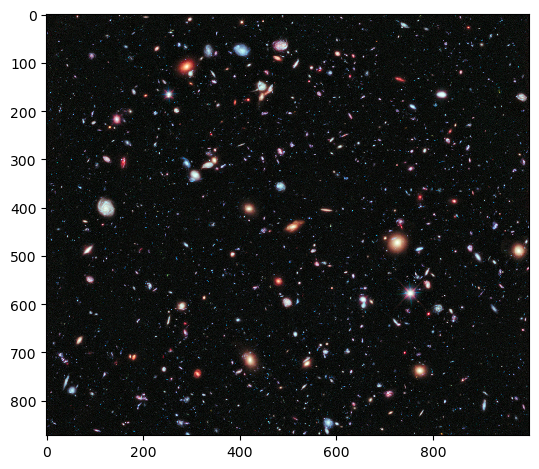

In [33]:
hubble = data.hubble_deep_field()
io.imshow(hubble)

In [36]:
# otsu

hubble_gray = rgb2gray(hubble)
otsu = threshold_otsu(hubble_gray)
binary = hubble_gray > otsu
io.imshow(binary)

NameError: name 'rgb2gray' is not defined